In [1]:
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
import os
import matplotlib.pyplot as plt

def load_data_from_file(file_path,eval_type):
    data = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        current_key = None
        for line in lines:
            line = line.strip()
            if line.startswith(f"{eval_type}-"):
                current_key = line
                data[current_key] = {}
            elif current_key and "=" in line:
                key, value = line.split("=")
                data[current_key][key.strip()] = float(value.strip())
    return data

# Specify the directory containing the text files
directory = "../results"



# Get a list of text file names in the directory
file_names = [file for file in os.listdir(directory) if file.endswith(".txt")]

# Load data from multiple text files
data_list = []
file_list=[]
eval_type='val'
for file_name in file_names:
    if file_name.startswith(eval_type):
        file_path = os.path.join(directory, file_name)
        data = load_data_from_file(file_path,eval_type)
        data_list.append(data)
        file_list.append(file_name)

# Extract labels and accuracies from the data dictionaries
labels = list(data_list[0].keys())

# labels = [key for key in labels if key.split(eval_type+'-')[1] in lang_list]
accuracies_list = []
for i,data in enumerate(data_list):
    # print(data)
    # if data[key]!='val-copa-ck':
    accuracies = [data[key]["test_accuracy"] if key!='val-copa-ck' else 0 for key in labels]
    accuracies_list.append(accuracies)

    
    
all_data={}
for j,acc in enumerate(accuracies_list):
    fname=file_list[j].replace(f'{eval_type}_','')
    fname=fname.replace(f'.txt','')
    all_data[fname]={}
    for i,acc_one in enumerate(acc):
        label=labels[i].replace(f'{eval_type}-copa-','')
        all_data[fname][label]=acc[i]



In [3]:
df=pd.DataFrame.from_dict(all_data).T

In [6]:
df=df[['en', 'hr', 'mk', 'sl', 'sl-cer', 'sr', 'sr-tor']]

/tmp/ipykernel_1923369/627046397.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


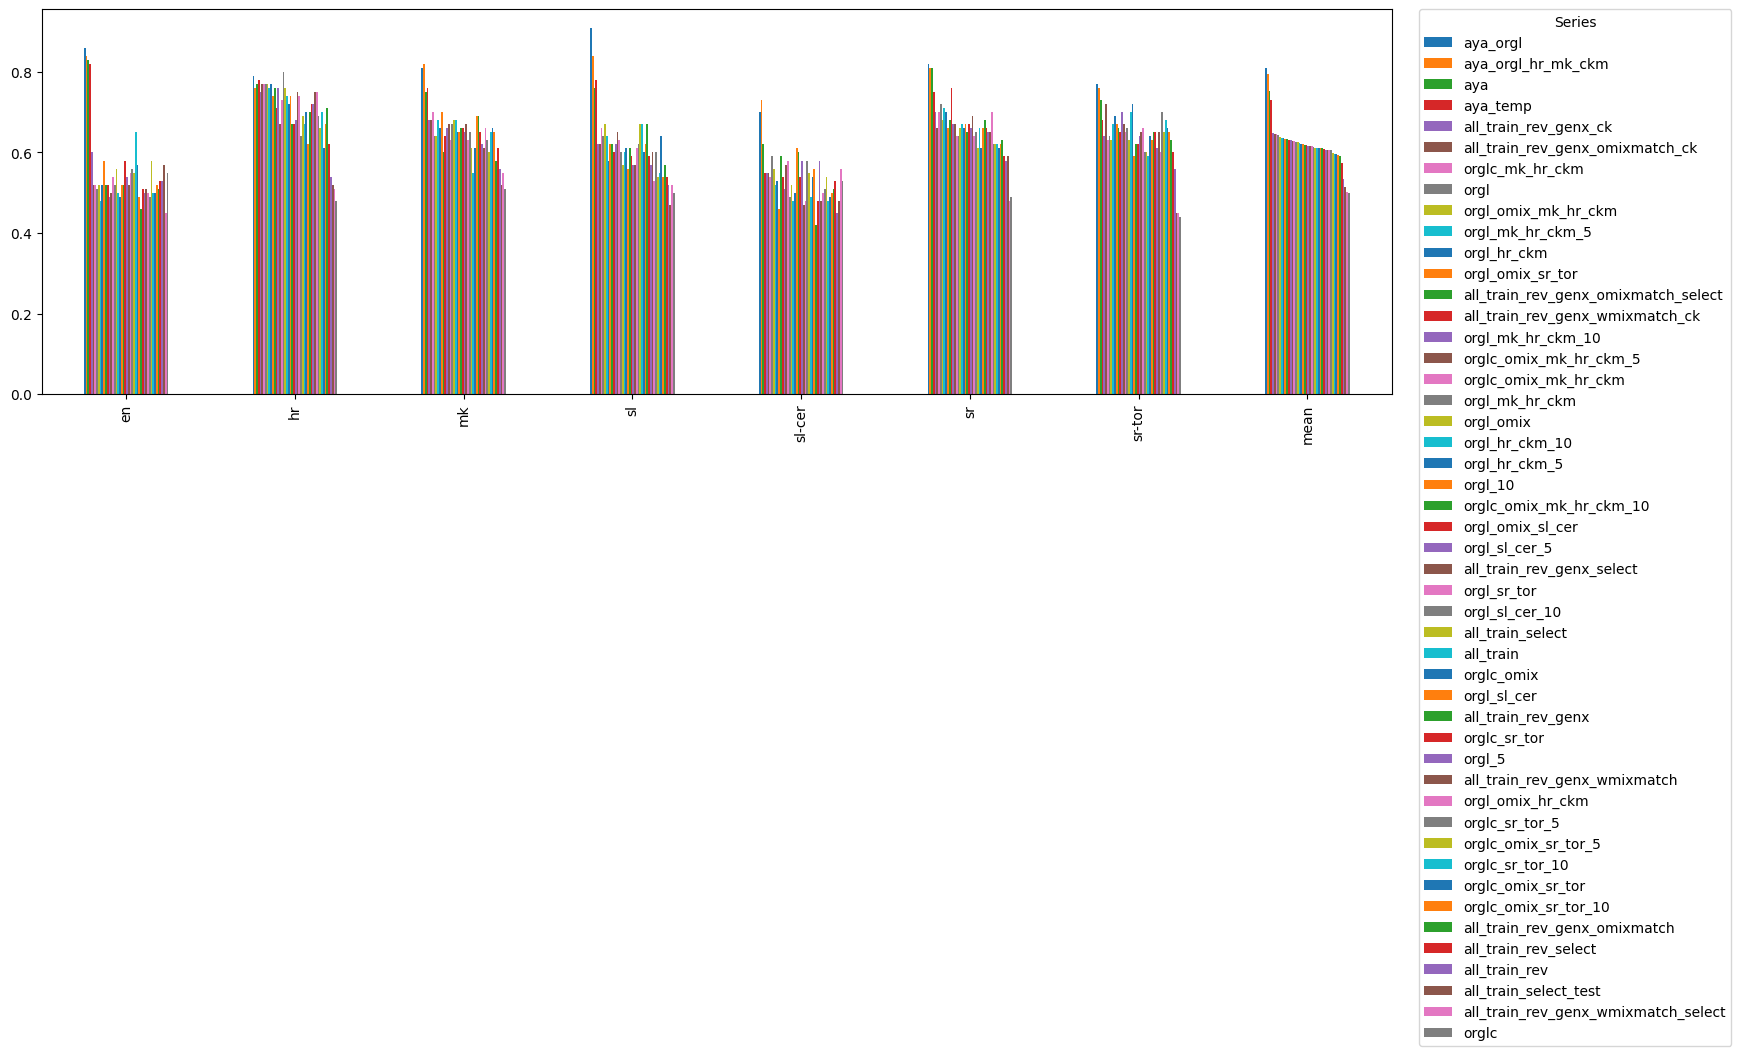

In [7]:

df['mean']=df.mean(axis=1)
df=df.sort_values(by=['mean'],ascending=False).T

ax=df.plot(kind='bar',figsize=(20,5))
# Position the legend outside the plot
plt.legend(title='Series', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Adjust the spacing between the plot and the legend
plt.subplots_adjust(right=0.8)
plt.tight_layout()

In [8]:
df.T

,en,hr,mk,sl,sl-cer,sr,sr-tor,mean
aya_orgl,0.86,0.79,0.81,0.91,0.70,0.82,0.77,0.808571
aya_orgl_hr_mk_ckm,0.84,0.76,0.82,0.84,0.73,0.81,0.76,0.794286
aya,0.83,0.77,0.75,0.76,0.62,0.81,0.73,0.752857
aya_temp,0.82,0.78,0.76,0.78,0.55,0.75,0.68,0.731429
all_train_rev_genx_ck,0.60,0.75,0.68,0.62,0.55,0.70,0.64,0.648571
all_train_rev_genx_omixmatch_ck,0.52,0.77,0.68,0.62,0.55,0.66,0.72,0.645714
orglc_mk_hr_ckm,0.52,0.77,0.70,0.66,0.54,0.70,0.63,0.645714
orgl,0.51,0.77,0.64,0.64,0.59,0.72,0.64,0.644286
orgl_omix_mk_hr_ckm,0.52,0.77,0.64,0.67,0.56,0.68,0.63,0.638571
orgl_mk_hr_ckm_5,0.48,0.76,0.68,0.64,0.52,0.71,0.67,0.637143


/tmp/ipykernel_935990/1750371921.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


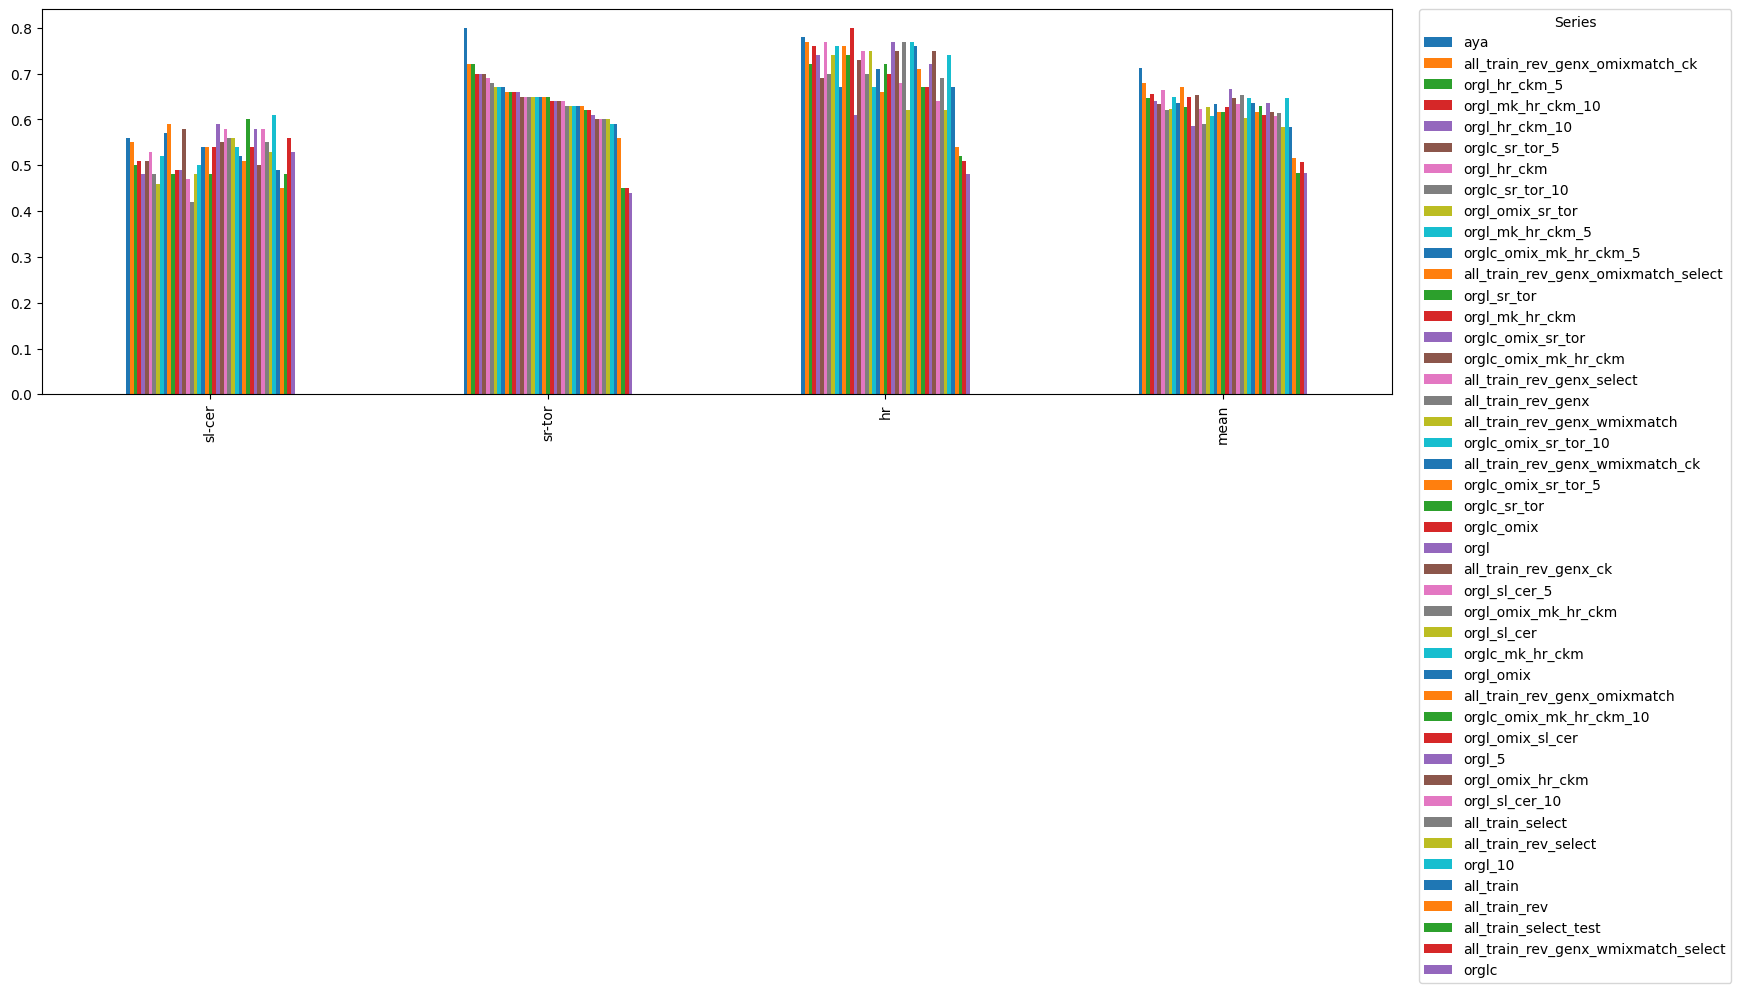

In [19]:
lang_list=['sl-cer','sr-tor','hr']

df=pd.DataFrame.from_dict(all_data).T
df=df[lang_list]
df['mean']=df.mean(axis=1)
df=df.sort_values(by=['sr-tor'],ascending=False).T

ax=df.plot(kind='bar',figsize=(20,5))
# Position the legend outside the plot
plt.legend(title='Series', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Adjust the spacing between the plot and the legend
plt.subplots_adjust(right=0.8)
plt.tight_layout()

In [20]:
df.T

,sl-cer,sr-tor,hr,mean
aya,0.56,0.80,0.78,0.713333
all_train_rev_genx_omixmatch_ck,0.55,0.72,0.77,0.680000
orgl_hr_ckm_5,0.50,0.72,0.72,0.646667
orgl_mk_hr_ckm_10,0.51,0.70,0.76,0.656667
orgl_hr_ckm_10,0.48,0.70,0.74,0.640000
orglc_sr_tor_5,0.51,0.70,0.69,0.633333
orgl_hr_ckm,0.53,0.69,0.77,0.663333
orglc_sr_tor_10,0.48,0.68,0.70,0.620000
orgl_omix_sr_tor,0.46,0.67,0.74,0.623333
orgl_mk_hr_ckm_5,0.52,0.67,0.76,0.650000


In [38]:
import pickle
with open('../output_models/all_val_acc.pickle','rb') as f:
    val_acc=pickle.load(f)
with open('../output_models/all_test_predictions.pickle','rb') as f:
    test_predictions=pickle.load(f)

In [39]:
# val_acc={'B': {'copa-hr': 0.77,
#   'copa-ck': 0.576,
#   'copa-sl-cer': 0.8766,
#   'copa-sr-tor': 0.74},'A': {'copa-hr': 0.577,
#   'copa-ck': 0.676,
#   'copa-sl-cer': 0.66,
#   'copa-sr-tor': 0.4374},'C': {'copa-hr': 0.777,
#   'copa-ck': 0.76,
#   'copa-sl-cer': 0.966,
#   'copa-sr-tor': 0.674},'D': {'copa-hr': 0.177,
#   'copa-ck': 0.876,
#   'copa-sl-cer': 0.866,
#   'copa-sr-tor': 0.7574},'H': {'copa-hr': 0.877,
#   'copa-ck': 0.3756,
#   'copa-sl-cer': 0.2466,
#   'copa-sr-tor': 0.2374},'I': {'copa-hr': 0.577,
#   'copa-ck': 0.7666,
#   'copa-sl-cer': 0.66,
#   'copa-sr-tor': 0.674},'j': {'copa-hr': 0.977,
#   'copa-ck': 0.76,
#   'copa-sl-cer': 0.166,
#   'copa-sr-tor': 0.2744},'l': {'copa-hr': 0.377,
#   'copa-ck': 0.76,
#   'copa-sl-cer': 0.66,
#   'copa-sr-tor': 0.74},'m': {'copa-hr': 0.2757,
#   'copa-ck': 0.176,
#   'copa-sl-cer': 0.366,
#   'copa-sr-tor': 0.474}}

In [40]:
import pandas as pd
val_acc_df=pd.DataFrame.from_dict(val_acc).T

In [41]:
all_dicts={}
all_dicts_k={}
for x in val_acc_df.columns:
    all_dicts[x]=val_acc_df[x].to_dict()
    all_dicts[x]= {k: v for k, v in sorted(all_dicts[x].items(), key=lambda item: item[1],reverse=True)}
    all_dicts_k[x]= {k:v for v,k in enumerate(all_dicts[x].keys())}

In [42]:
# all_dicts_k

In [43]:
dict_df=pd.DataFrame.from_dict(all_dicts)

In [44]:
dict_df['sum']=dict_df.mean(axis=1)

In [53]:
dict_df = dict_df.sort_values(by=['sum'],ascending=False)

In [54]:
dict_df=dict_df.round(2)

In [55]:
dict_df.to_csv('temp.csv')

In [56]:
print(dict_df.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
 & copa-hr & copa-ck & copa-sl-cer & copa-sr-tor & sum \\
\midrule
orglc_omix_mk_hr_ckm_test & 0.79 & 0.77 & 0.68 & 0.78 & 0.76 \\
aya & 0.81 & 0.76 & 0.70 & 0.74 & 0.75 \\
orgl_mk_hr_ckm_test & 0.77 & 0.77 & 0.70 & 0.77 & 0.75 \\
orgl_test & 0.79 & 0.72 & 0.66 & 0.76 & 0.73 \\
orgl_hr_ckm_test & 0.77 & 0.76 & 0.66 & 0.74 & 0.73 \\
all_train_rev_genx_omixmatch_ck & 0.77 & 0.70 & 0.55 & 0.72 & 0.69 \\
all_train_rev_genx_omixmatch_select & 0.76 & 0.77 & 0.59 & 0.66 & 0.69 \\
orgl_sl_cer_test & 0.74 & 0.69 & 0.57 & 0.75 & 0.69 \\
orgl_mk_hr_ckm_10 & 0.76 & 0.78 & 0.51 & 0.70 & 0.69 \\
orgl_mk_hr_ckm & 0.76 & 0.78 & 0.52 & 0.67 & 0.68 \\
orgl_10 & 0.74 & 0.73 & 0.61 & 0.59 & 0.67 \\
orgl_hr_ckm_10 & 0.74 & 0.75 & 0.48 & 0.70 & 0.67 \\
orglc_mk_hr_ckm & 0.77 & 0.75 & 0.54 & 0.63 & 0.67 \\
all_train_rev_genx_ck & 0.75 & 0.74 & 0.55 & 0.64 & 0.67 \\
orgl_omix_mk_hr_ckm & 0.77 & 0.74 & 0.56 & 0.63 & 0.67 \\
orgl_hr_ckm & 0.72 & 0.71 & 0.50 & 0.72 & 0.66 \\
orgl

In [10]:
all_selected=[]
for k in all_dicts:
    all_selected.extend(list(all_dicts[k].keys())[:6])
    print(list(all_dicts[k].keys())[:6])

['aya', 'orgl_test', 'orglc_omix_mk_hr_ckm_test', 'orgl_hr_ckm_test', 'orgl_mk_hr_ckm_test', 'all_train_rev_genx_omixmatch_ck']
['orgl_mk_hr_ckm', 'orgl_mk_hr_ckm_10', 'orgl_mk_hr_ckm_test', 'orglc_omix_mk_hr_ckm_test', 'all_train_rev_genx_omixmatch_select', 'orgl_omix_hr_ckm']
['orgl_mk_hr_ckm_test', 'aya', 'orglc_omix_mk_hr_ckm_test', 'orgl_hr_ckm_test', 'orgl_test', 'orgl_10']
['orglc_omix_mk_hr_ckm_test', 'orgl_mk_hr_ckm_test', 'orgl_test', 'orgl_sl_cer_test', 'orgl_hr_ckm_test', 'aya']


In [11]:
set(all_selected)

{'all_train_rev_genx_omixmatch_ck',
 'all_train_rev_genx_omixmatch_select',
 'aya',
 'orgl_10',
 'orgl_hr_ckm_test',
 'orgl_mk_hr_ckm',
 'orgl_mk_hr_ckm_10',
 'orgl_mk_hr_ckm_test',
 'orgl_omix_hr_ckm',
 'orgl_sl_cer_test',
 'orgl_test',
 'orglc_omix_mk_hr_ckm_test'}

In [12]:
my_indexes=dict_df[dict_df.index.isin(list(all_selected))].index

In [13]:
my_indexes=['orglc_omix_mk_hr_ckm_test', 'orgl_mk_hr_ckm_test', 'aya',
       'orgl_hr_ckm_test', 'orgl_test', 'all_train_rev_genx_omixmatch_select',
       'orgl_mk_hr_ckm', 'orgl_mk_hr_ckm_10', 'orgl_sl_cer_test', 'orgl_10',]

In [14]:
import json
for index in my_indexes:
    for lang, pred in test_predictions[index].items():
        print(index,lang, len(pred))
        if str(type(test_predictions[index][lang]))=="<class 'numpy.ndarray'>":
            pred=pred.tolist()
        with open(f'../test_outputs/{lang}.{index}.json', 'w') as f:
            json.dump(pred, f, indent=1)

orglc_omix_mk_hr_ckm_test copa-hr-ckm 500
orglc_omix_mk_hr_ckm_test copa-sl-cer 500
orglc_omix_mk_hr_ckm_test copa-sr-tor 500
orgl_mk_hr_ckm_test copa-hr-ckm 500
orgl_mk_hr_ckm_test copa-sl-cer 500
orgl_mk_hr_ckm_test copa-sr-tor 500
aya copa-hr-ckm 500
aya copa-sl-cer 500
aya copa-sr-tor 500
orgl_hr_ckm_test copa-hr-ckm 500
orgl_hr_ckm_test copa-sl-cer 500
orgl_hr_ckm_test copa-sr-tor 500
orgl_test copa-hr-ckm 500
orgl_test copa-sl-cer 500
orgl_test copa-sr-tor 500
all_train_rev_genx_omixmatch_select copa-hr-ckm 500
all_train_rev_genx_omixmatch_select copa-sl-cer 500
all_train_rev_genx_omixmatch_select copa-sr-tor 500
orgl_mk_hr_ckm copa-hr-ckm 500
orgl_mk_hr_ckm copa-sl-cer 500
orgl_mk_hr_ckm copa-sr-tor 500
orgl_mk_hr_ckm_10 copa-hr-ckm 500
orgl_mk_hr_ckm_10 copa-sl-cer 500
orgl_mk_hr_ckm_10 copa-sr-tor 500
orgl_sl_cer_test copa-hr-ckm 500
orgl_sl_cer_test copa-sl-cer 500
orgl_sl_cer_test copa-sr-tor 500
orgl_10 copa-hr-ckm 500
orgl_10 copa-sl-cer 500
orgl_10 copa-sr-tor 500
